In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import supervision as sv
import cv2
from sklearn.model_selection import train_test_split

In [4]:
main_path = "/root/Master_Thesis/"
sam_path = main_path + "sam/sam_vit_h_4b8939.pth"
raw_data_path = main_path + "data/raw/"
processed_data_path = main_path + "data/processed/"
oracle_path = processed_data_path +"oracle/"
dataframes_path = main_path + "data/dataframes/"

In [5]:
def create_df(images_path, masks_path, df_name=None):
    images =[]
    masks = []
    oracle=[]
    source = df_name.split("_df")[0]
    for dirname, _, filenames in os.walk(images_path):
        for filename in filenames:
            images.append(os.path.join(dirname, filename))
            masks.append(os.path.join(masks_path, filename))
            oracle.append(os.path.join(oracle_path, "{}.npy".format(source+"_"+filename.split('.')[0])))
    df = pd.DataFrame({"images": images,
                       "masks": masks,
                       "oracle":oracle})
    if not df_name is None:
        df.to_csv(dataframes_path + df_name)
    
    return df

In [6]:
##Get raw_paths and compose processed_paths

# brain_mri_path = raw_data_path + "Brain_MRI_segmentation/kaggle_3m/"

# brain_mri_processed_images_path = processed_data_path + "Brain_MRI_segmentation/images/"
# brain_mri_processed_masks_path = processed_data_path + "Brain_MRI_segmentation/masks/"
# oracle_path = processed_data_path + "Brain_MRI_segmentation/oracle/"

# images = []
# masks = []
# oracle = []
# processed_images = []
# processed_masks = []
# source = "brain"
# for dirname, _, filenames in os.walk(brain_mri_path):
#     for filename in filenames:
#         file = filename.split(".tif")[0]
#         if file.endswith("_mask"):
#             img_file = file[:-5] + ".tif"
#             masks.append(os.path.join(dirname, filename))
#             images.append(os.path.join(dirname, img_file))            
#             oracle.append(os.path.join(oracle_path, "{}.npy".format(source+"_"+file)))
            
#             processed_images.append(os.path.join(brain_mri_processed_images_path, "{}.npy".format(source+"_"+file)))
#             processed_masks.append(os.path.join(brain_mri_processed_masks_path, "{}.npy".format(source+"_"+file)))        

## Create and split a dataframe for previous paths                        
# brain_df = pd.DataFrame({"raw_images": images,
#                     "raw_masks": masks,
#                     "images": processed_images,
#                     "masks": processed_masks,                    
#                     "oracle":oracle})

# brain_df.to_csv(dataframes_path + "brain_df.csv")

# brain_df = pd.read_csv(dataframes_path+"brain_df.csv")
# brain_df_train, brain_df_test = train_test_split(brain_df, test_size=0.3, random_state=42, shuffle=True)
# brain_df_train.to_csv(dataframes_path+"brain_df_train.csv")
# brain_df_test.to_csv(dataframes_path+"brain_df_test.csv")


##Process images and masks and save them in corresponding paths
# for i in range(len(brain_df)):
#     processed_mask = cv2.resize(cv2.cvtColor(cv2.imread(brain_df["raw_masks"][i]), cv2.COLOR_BGR2GRAY), (128, 128), interpolation=cv2.INTER_CUBIC)
#     processed_image =  cv2.resize(cv2.cvtColor(cv2.imread(brain_df["raw_images"][i]), cv2.COLOR_BGR2RGB), (128, 128), interpolation=cv2.INTER_CUBIC)
    
#     processed_image_dir = os.path.dirname(brain_df["images"][i])
#     if not os.path.exists(processed_image_dir):
#         os.makedirs(processed_image_dir)
    
#     np.save(brain_df["images"][i], processed_image)
    
#     processed_mask_dir = os.path.dirname(brain_df["masks"][i])
#     if not os.path.exists(processed_mask_dir):
#         os.makedirs(processed_mask_dir)
    
#     np.save(brain_df["masks"][i], processed_mask)


In [7]:
# #Get raw_paths and compose processed_paths
# lung_dataset_path = raw_data_path + "Lung_Tumor_Segmentation/"

# lung_processed_images_path = processed_data_path + "Lung_Tumor_Segmentation/images/"
# lung_processed_masks_path = processed_data_path + "Lung_Tumor_Segmentation/masks/"
# oracle_path = processed_data_path + "Lung_Tumor_Segmentation/oracle/"

# images = []
# masks = []
# oracle = []
# processed_images = []
# processed_masks = []
# source = "lung"
# for dirname, _, filenames in os.walk(lung_dataset_path):
#     if dirname.endswith("data"):
#         mask_dir = dirname[:-4]
#         for filename in filenames:
#             mask_path = os.path.join(mask_dir, "masks", filename)
#             mask = np.load(mask_path, allow_pickle=True)
#             if mask.sum()>0:
#                 images.append(os.path.join(dirname, filename))
#                 masks.append(os.path.join(mask_dir, "masks", filename))
#                 oracle.append(os.path.join(oracle_path, "{}.npy".format(source+"_"+filename.split('.')[0])))
#                 processed_images.append(os.path.join(lung_processed_images_path, "{}.npy".format(source+"_"+filename.split('.')[0])))
#                 processed_masks.append(os.path.join(lung_processed_masks_path, "{}.npy".format(source+"_"+filename.split('.')[0])))
            
# # Create and split a dataframe for previous paths                        
# lung_df = pd.DataFrame({"raw_images": images,
#                     "raw_masks": masks,
#                     "images": processed_images,
#                     "masks": processed_masks,                    
#                     "oracle":oracle})

# lung_df.to_csv(dataframes_path + "lung_df.csv")

lung_df = pd.read_csv(dataframes_path+"lung_df.csv")
# lung_df_train, lung_df_test = train_test_split(lung_df, test_size=0.3, random_state=42, shuffle=True)
# lung_df_train.to_csv(dataframes_path+"lung_df_train.csv")
# lung_df_test.to_csv(dataframes_path+"lung_df_test.csv")

# #Process images and masks and save them in corresponding paths
for i in range(len(lung_df)):
    processed_mask = cv2.resize(np.load(lung_df["raw_masks"][i], allow_pickle=True), (128, 128), interpolation=cv2.INTER_CUBIC)
    processed_image = cv2.resize(cv2.cvtColor((np.load(lung_df["raw_images"][i], allow_pickle=True)* 255.0).astype(np.uint8), cv2.COLOR_GRAY2RGB), (128,128), interpolation=cv2.INTER_CUBIC)/255.0
    
    processed_image_dir = os.path.dirname(lung_df["images"][i])
    if not os.path.exists(processed_image_dir):
        os.makedirs(processed_image_dir)
    
    np.save(lung_df["images"][i], processed_image)
    
    processed_mask_dir = os.path.dirname(lung_df["masks"][i])
    if not os.path.exists(processed_mask_dir):
        os.makedirs(processed_mask_dir)
    
    np.save(lung_df["masks"][i], processed_mask)

0

In [150]:
# #Get raw_paths and compose processed_paths
# flood_images_path = raw_data_path + "flood_area_segmentation/Image/"
# flood_masks_path = raw_data_path + "flood_area_segmentation/Mask/"

# flood_processed_images_path = processed_data_path + "flood_area_segmentation/images/"
# flood_processed_masks_path = processed_data_path + "flood_area_segmentation/masks/"
# oracle_path = processed_data_path + "flood_area_segmentation/oracle/"

# images = []
# masks = []
# oracle = []
# processed_images = []
# processed_masks = []
# source = "flood"

# for dirname, _, filenames in os.walk(flood_images_path):
#     for filename in filenames:
#         file = filename.split(".jpg")[0]
#         mask_file = file + ".png"
#         images.append(os.path.join(dirname, filename))
#         masks.append(os.path.join(flood_masks_path, mask_file))
#         oracle.append(os.path.join(oracle_path, "{}.npy".format(source+"_"+file)))    
#         processed_images.append(os.path.join(flood_processed_images_path, "{}.npy".format(source+"_"+file)))
#         processed_masks.append(os.path.join(flood_processed_masks_path, "{}.npy".format(source+"_"+file)))

# ## Create and split a dataframe for previous paths                        
# flood_df = pd.DataFrame({"raw_images": images,
#                     "raw_masks": masks,
#                     "images": processed_images,
#                     "masks": processed_masks,                    
#                     "oracle":oracle})

# flood_df.to_csv(dataframes_path + "flood_df.csv")

# flood_df = pd.read_csv(dataframes_path+"flood_df.csv")
# flood_df_train, flood_df_test = train_test_split(flood_df, test_size=0.3, random_state=42, shuffle=True)
# flood_df_train.to_csv(dataframes_path+"flood_df_train.csv")
# flood_df_test.to_csv(dataframes_path+"flood_df_test.csv")

# ##Process images and masks and save them in corresponding paths

# for i in range(len(flood_df)):
#     try:
#         processed_mask = (cv2.resize(cv2.cvtColor(cv2.imread(flood_df["raw_masks"][i]), cv2.COLOR_BGR2GRAY), (128, 128), interpolation=cv2.INTER_CUBIC)/255).astype(np.uint8)
#         processed_image = cv2.resize(cv2.cvtColor(cv2.imread(flood_df["raw_images"][i]), cv2.COLOR_BGR2RGB), (128,128), interpolation=cv2.INTER_CUBIC)
    
#         processed_image_dir = os.path.dirname(flood_df["images"][i])
#         if not os.path.exists(processed_image_dir):
#             os.makedirs(processed_image_dir)
        
#         np.save(flood_df["images"][i], processed_image)
        
#         processed_mask_dir = os.path.dirname(flood_df["masks"][i])
#         if not os.path.exists(processed_mask_dir):
#             os.makedirs(processed_mask_dir)
        
#         np.save(flood_df["masks"][i], processed_mask)
#     except:
#         print(i)

In [132]:
for i in range(len(flood_df)):
    processed_mask = (cv2.resize(cv2.cvtColor(cv2.imread(flood_df["raw_masks"][i]), cv2.COLOR_BGR2GRAY), (128, 128), interpolation=cv2.INTER_CUBIC)/255).astype(np.uint8)
    if processed_mask.sum()>0:
        processed_image = cv2.resize(cv2.cvtColor(cv2.imread(flood_df["raw_images"][i]), cv2.COLOR_BGR2RGB), (128,128), interpolation=cv2.INTER_CUBIC)
        break
    

In [133]:
processed_mask.shape

(128, 128)

In [134]:
processed_mask.max()

1

In [135]:
processed_image.shape

(128, 128, 3)

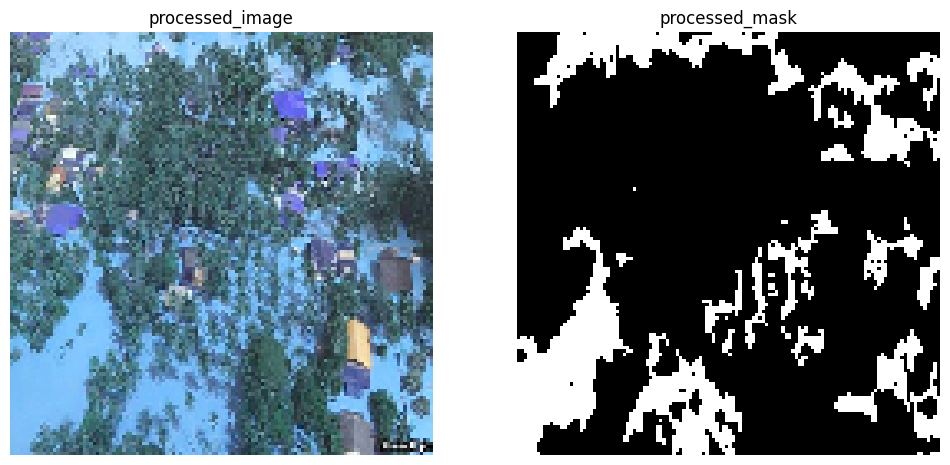

In [136]:
sv.plot_images_grid(
    images=[processed_image, processed_mask],
    grid_size=(1, 2),
    titles=['processed_image', 'processed_mask']
    
)

In [21]:
processed_mask.shape

(256, 256)

In [18]:
raw_masks.shape

(4000, 6000, 3)

In [13]:
print(aerial_df["raw_images"][0],"\n",
      aerial_df["raw_masks"][0],"\n",
      aerial_df["images"][0],"\n",
      aerial_df["masks"][0],"\n",
      aerial_df["oracle"][0])

/root/Master_Thesis/data/raw/Aerial_Semantic_Segmentation_Drone_Dataset/dataset/semantic_drone_dataset/original_images/056.jpg 
 /root/Master_Thesis/data/raw/Aerial_Semantic_Segmentation_Drone_Dataset/dataset/semantic_drone_dataset/label_images_semantic/056.png 
 /root/Master_Thesis/data/processed/Aerial_Semantic_Segmentation_Drone_Dataset/images/aerial_056.png 
 /root/Master_Thesis/data/processed/Aerial_Semantic_Segmentation_Drone_Dataset/masks/aerial_056.npy 
 /root/Master_Thesis/data/processed/Aerial_Semantic_Segmentation_Drone_Dataset/oracle/aerial_056.npy


In [10]:
clothing_images_path = raw_data_path + "People_Clothing_Segmentation/png_images/IMAGES/"
clothing_masks_path = raw_data_path + "People_Clothing_Segmentation/png_masks/MASKS/"
images = []
masks = []
oracle = []
source = "clothing"
for dirname, _, filenames in os.walk(clothing_images_path):
    for filename in filenames:
        file = filename[3:]
        mask_file = "seg"+file
        images.append(os.path.join(dirname, filename))
        masks.append(os.path.join(clothing_masks_path, mask_file))
        oracle.append(os.path.join(oracle_path, "{}.npy".format(source+"_"+mask_file.split(".")[0])))        


clothing_df = pd.DataFrame({"images": images,
                    "masks": masks,
                    "oracle":oracle})

clothing_df.to_csv(dataframes_path + "clothing_df.csv")

In [11]:

# brain_tumor_images_path = raw_data_path + "Brain_Tumor_Segmentation/images/"
# brain_tumor_masks_path = raw_data_path + "Brain_Tumor_Segmentation/masks/"
# brain_tumor_df = create_df(brain_tumor_images_path, brain_tumor_masks_path, df_name="brain_tumor_df.csv")

In [12]:
# liver_path = raw_data_path + "Liver_and_Liver_Tumor_Segmentation/dataset_6/"
# old_liver_df = raw_data_path + "Liver_and_Liver_Tumor_Segmentation/lits_df.csv"
# df = pd.read_csv(old_liver_df)


# source = "liver"
# oracle=[]
# images_path = df["filepath"].to_list()
# images = [liver_path + path[18:] for path in images_path]
# print(images[0])

# tumor_mask_path = df["tumor_maskpath"].to_list()
# masks = [liver_path + path[18:] for path in tumor_mask_path]
# print(masks[0])

# for mask_path in masks:
#     file_name = os.path.basename(mask_path).split('.')[0]
#     oracle.append(os.path.join(oracle_path, "{}.npy".format(source+"_"+file_name)))

# # liver_mask_path = df["liver_maskpath"].to_list()
# # liver_masks = [liver_path + path[18:] for path in liver_mask_path]

# liver_df = pd.DataFrame({"images": images,
#                     "masks": masks,
#                     "oracle":oracle})

# liver_df.to_csv(dataframes_path + "liver_df.csv")

In [13]:
# dfs to exclude:
# clothing_df.csv
# liver_df.csv
# lung_df.csv
# aerial_df.csv
# train_df.csv
# test_df.csv
# all_dfs.csv

In [14]:
# images = []
# masks = []
# oracle = []

# for dirname, _, filenames in os.walk(dataframes_path):
#     for filename in filenames:
#         if not filename in ["lung_df.csv", "train_df.csv", "test_df.csv", "all_dfs.csv", "aerial_df.csv", "clothing_df.csv", "liver_df.csv"]:
#             df = pd.read_csv(os.path.join(dirname, filename))
#             images.extend(df["images"].to_list())
#             masks.extend(df["masks"].to_list())
#             print(filename)
#             oracle.extend(df["oracle"].to_list())

# all_dfs = pd.DataFrame({"images": images,
#                         "masks": masks,
#                         "oracle": oracle})

# all_dfs.to_csv(dataframes_path + "all_dfs.csv")

# train_df, test_df = train_test_split(all_dfs, test_size=0.3, random_state=42, shuffle=True)
# train_df = train_df.reset_index(drop=True)
# test_df = test_df.reset_index(drop=True)
# train_df.to_csv(dataframes_path+"train_df.csv")
# test_df.to_csv(dataframes_path+"test_df.csv")

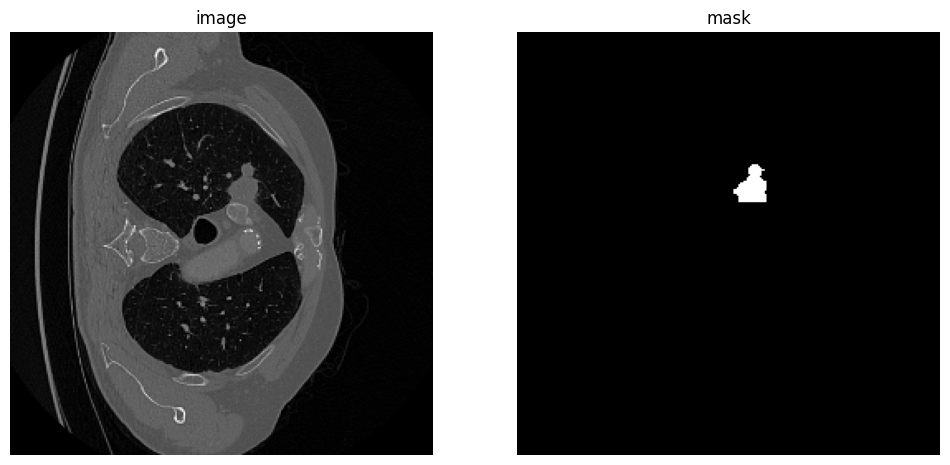

In [85]:
i=10
# image = cv2.imread(lung_df["images"][i])
# mask = cv2.imread(lung_df["masks"][i])

image = np.load(lung_df["images"][i], allow_pickle=True)
mask = np.load(lung_df["masks"][i], allow_pickle=True)

sv.plot_images_grid(
    images=[image, mask],
    grid_size=(1, 2),
    titles=['image', 'mask']
)


In [52]:
import torchvision.transforms.functional as TF
from PIL import Image
label = TF.to_tensor(Image.open(aerial_df["masks"][i]).convert("L"))
label.shape


torch.Size([1, 4000, 6000])

In [30]:
mask = np.sum(mask, axis=-1)

In [24]:
aerial_df["masks"][i]

'/root/Master_Thesis/data/raw/Aerial_Semantic_Segmentation_Drone_Dataset/dataset/semantic_drone_dataset/label_images_semantic/056.png'

In [39]:
len(aerial_df)

400

In [16]:
# images = brain_df["images"].to_list()
# masks = brain_df["masks"].to_list()
# oracle = brain_df["oracle"].to_list()
# len(images)

In [48]:
sam_mask = "/root/Master_Thesis/data/processed/oracle_gen_pred/brain_TCGA_HT_7881_19981015_26_mask.npy"
original_mask = "/root/Master_Thesis/data/raw/Brain_MRI_segmentatio/kaggle_3m/TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_14_mask.tif"

In [49]:
# if os.path.isfile(original_mask):
#     print("here")

import numpy as np
import torch

s_mask = np.load(sam_mask)
mask = torch.as_tensor(s_mask).float()
o_mask = cv2.imread(original_mask)

tp, fp, fn, tn = smp.metrics.get_stats(model_predicted_mask.long(), mask.long(), mode="binary")            

print(s_mask.shape)
print(o_mask.shape)

(1, 256, 256)
(256, 256, 3)


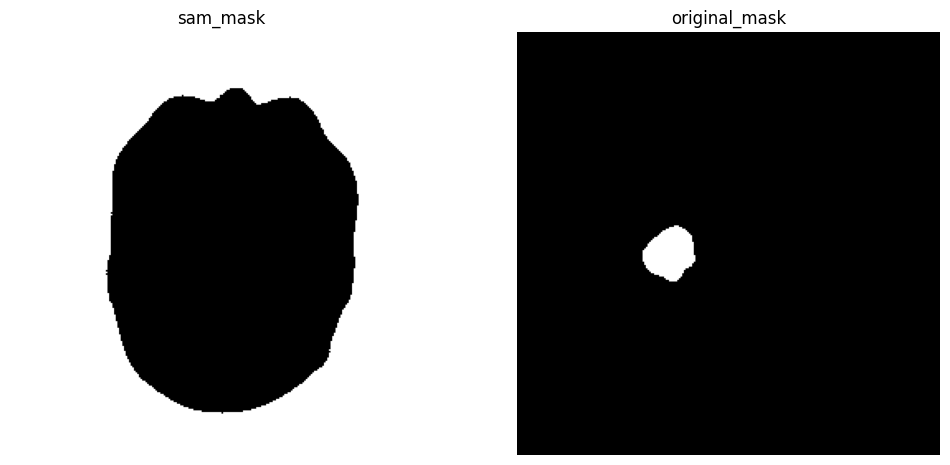

In [50]:
idx=39
# image = cv2.imread(images[idx])
# mask = cv2.imread(masks[idx])
sv.plot_images_grid(
    images=[s_mask[0], o_mask[:, :, 0]],
    grid_size=(1, 2),
    titles=['sam_mask', 'original_mask']
)

In [ ]:
processed_imgaes_path = main_path + "data/processed/images/"
processed_masks_path = main_path + "data/processed/masks/"

if not os.path.exists(processed_imgaes_path):
    os.makedirs(processed_imgaes_path)

if not os.path.exists(processed_masks_path):
    os.makedirs(processed_masks_path)

In [45]:
out_fire_imgs = [processed_imgaes_path + path.split("/")[-1].split(".")[0]+".npy" for path in fire_images]
out_fire_masks = [processed_masks_path + path.split("/")[-1].split(".")[0]+".png" for path in fire_masks]